In [1]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os

# London street network within the border of ULEZ2021 

Read in ULEZ21 boundary

In [2]:
boundary = gpd.read_file('data/ulez3.shp')
boundary

,fid,boundary,objectid,shape_area,shape_leng,st_area(ge,st_length(,url,runtime,geometry
0,1.0,ULEZ expansion,1.0,3.813718e+08,78065.961563,3.813718e+08,0.0,https://tfl.gov.uk/modes/driving/low-emission-...,08/29/2019,"POLYGON ((537407.624 191003.846, 537577.629 19..."


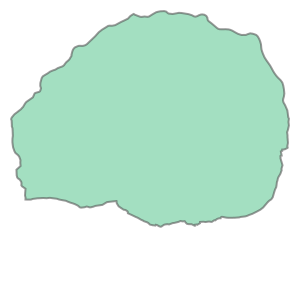

In [3]:
# create a shapely polygon for restricting London network
polygon = boundary["geometry"].iloc[0]
polygon

In [24]:
# print(polygon)

In [4]:
from shapely.wkt import loads
import osmnx as ox
geom = loads(str(polygon))
latlng_geom, _ = ox.projection.project_geometry(geom, crs={'init':'epsg:27700'}, to_latlong=True)

#drivable network
G = ox.graph_from_polygon(latlng_geom, network_type='drive')

#walking network
# G_walk = ox.graph_from_polygon(latlng_geom, network_type='walk')

C:\Users\Alicja\anaconda3\envs\ox\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


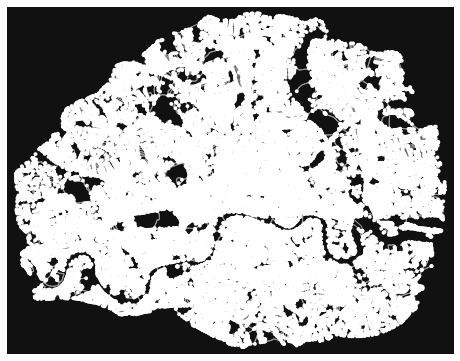

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [5]:
# see the network
ox.plot_graph(G)

In [6]:
# save graph as a shapefile to work with in R
ox.io.save_graph_shapefile(G_walk)

C:\Users\Alicja\anaconda3\envs\ox\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
